## Popular names in USA
* Data source： https://www.ssa.gov/oact/babynames/limits.html
* Include all babies name borned from 1990 to 2021. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as re
import scipy

%matplotlib inline

In [2]:
# load data

years = range(1990, 2022) 
pieces = [] # create a list 
columns = ['name', 'gender', 'frequency']

for year in years: 
    path = 'names 1990-2021/yob%d.txt' % year   #%d operator is put where the integer is to be specified
    frame = pd.read_csv(path, names=columns) #  load data
    frame['year'] = year 
    pieces.append(frame)
    

In [3]:
baby_names = pd.concat(pieces, ignore_index=True) # transfer to pd data 

In [4]:
baby_names

,name,gender,frequency,year
0,Jessica,F,46481,1990
1,Ashley,F,45560,1990
2,Brittany,F,36536,1990
3,Amanda,F,34409,1990
4,Samantha,F,25868,1990
...,...,...,...,...
982931,Zykell,M,5,2021
982932,Zylus,M,5,2021
982933,Zymari,M,5,2021
982934,Zyn,M,5,2021


In [5]:
baby_names.head(10) # see first 10 lines data 

,name,gender,frequency,year
0,Jessica,F,46481,1990
1,Ashley,F,45560,1990
2,Brittany,F,36536,1990
3,Amanda,F,34409,1990
4,Samantha,F,25868,1990
5,Sarah,F,25821,1990
6,Stephanie,F,24863,1990
7,Jennifer,F,22234,1990
8,Elizabeth,F,20749,1990
9,Lauren,F,20508,1990


## Specify which names are the most popular from 1990-2021

In [6]:
baby_names.groupby('name').agg({'frequency':sum})

,frequency
name,
Aaban,120
Aabha,51
Aabid,16
Aabidah,5
Aabir,10
...,...
Zyvion,5
Zyvon,7
Zyyanna,6


In [7]:
#sort all values in descending order after aggregation
baby_names.groupby('name').agg({'frequency':sum}).sort_values(by=['frequency'],ascending=[0])

,frequency
name,
Michael,879880
Jacob,754333
Matthew,714963
Joshua,680211
Christopher,679146
...,...
Briayla,5
Briazia,5
Nhala,5


## The comparison between male and female in the past 10 years

In [8]:
freq_by_gender_year = baby_names.pivot_table(index ='year', columns='gender',
                                             values = 'frequency', aggfunc=sum)

In [9]:
freq_by_gender_year.tail(10)

gender,F,M
year,,
2012,1759366,1895285
2013,1752777,1889640
2014,1784227,1918546
2015,1782611,1914078
2016,1769164,1894723
2017,1723043,1847191
2018,1696917,1811738
2019,1673030,1788414
2020,1627098,1734277


## The visulaization of the comparison 

<AxesSubplot:title={'center':'Frequency by year and gender'}, xlabel='year'>

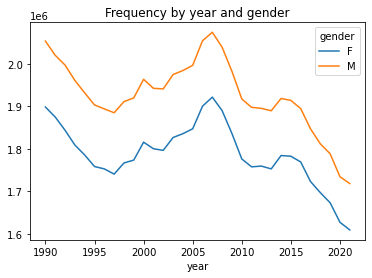

In [10]:
freq_by_gender_year.plot(title='Frequency by year and gender')

## The trend analysis of names

In [11]:
baby_names['ranked'] = baby_names.groupby(['year', 'gender'])['frequency'].rank(ascending=False)

In [12]:
baby_names.head(10)

,name,gender,frequency,year,ranked
0,Jessica,F,46481,1990,1.0
1,Ashley,F,45560,1990,2.0
2,Brittany,F,36536,1990,3.0
3,Amanda,F,34409,1990,4.0
4,Samantha,F,25868,1990,5.0
5,Sarah,F,25821,1990,6.0
6,Stephanie,F,24863,1990,7.0
7,Jennifer,F,22234,1990,8.0
8,Elizabeth,F,20749,1990,9.0
9,Lauren,F,20508,1990,10.0


In [13]:
def add_pct(group):# define a function to show percentage of each name 
    group['pct'] = group.frequency / group.frequency.sum()*100
    return group

# apply function 
baby_names = baby_names.groupby(['year', 'gender']).apply(add_pct) 

In [14]:
baby_names.head(10)

,name,gender,frequency,year,ranked,pct
0,Jessica,F,46481,1990,1.0,2.448496
1,Ashley,F,45560,1990,2.0,2.399980
2,Brittany,F,36536,1990,3.0,1.924620
3,Amanda,F,34409,1990,4.0,1.812575
4,Samantha,F,25868,1990,5.0,1.362658
5,Sarah,F,25821,1990,6.0,1.360182
6,Stephanie,F,24863,1990,7.0,1.309717
7,Jennifer,F,22234,1990,8.0,1.171228
8,Elizabeth,F,20749,1990,9.0,1.093002
9,Lauren,F,20508,1990,10.0,1.080307


In [15]:
dff = baby_names[baby_names.gender == 'F'] #divide data into male and female
dfm = baby_names[baby_names.gender == 'M']

In [16]:
# get the top names in both male and female
rank1m = dfm[dfm.ranked == 1]
rank1f = dff[dff.ranked == 1]

/var/folders/ns/h76j0lmj3f36gyjjdrtlhg1r0000gn/T/ipykernel_33714/3939879099.py:5: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  plt.xticks(scipy.arange(1990,2021,2), rotation=70)


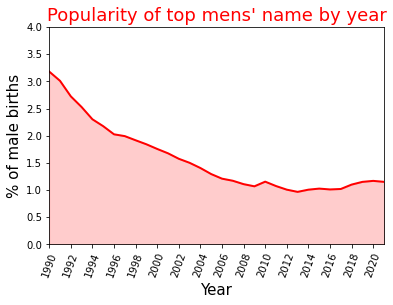

In [17]:
plt.plot(rank1m.year, rank1m.pct, color="red", linewidth = 2, label = 'Men')
plt.fill_between(rank1m.year, rank1m.pct, color="red", alpha = 0.2, interpolate=True)
plt.xlim(1990,2021)
plt.ylim(0,4)
plt.xticks(scipy.arange(1990,2021,2), rotation=70)
plt.title("Popularity of top mens' name by year", size=18, color="red")
plt.xlabel('Year', size=15)
plt.ylabel('% of male births', size=15)
plt.show()
plt.close()

/var/folders/ns/h76j0lmj3f36gyjjdrtlhg1r0000gn/T/ipykernel_33714/3483182847.py:5: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  plt.xticks(scipy.arange(1990,2021,2), rotation=70)


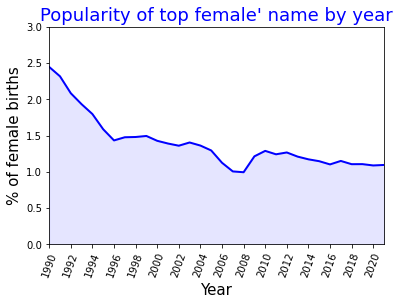

In [18]:
plt.plot(rank1f.year, rank1f.pct, color="blue", linewidth = 2, label = 'Women')
plt.fill_between(rank1f.year, rank1f.pct, color="blue", alpha = 0.1, interpolate=True)
plt.xlim(1990,2021)
plt.ylim(0,3)
plt.xticks(scipy.arange(1990,2021,2), rotation=70)
plt.title("Popularity of top female' name by year", size=18, color="blue")
plt.xlabel('Year', size=15)
plt.ylabel('% of female births', size=15)
plt.show()
plt.close()

# Why do the popularity of top male and female names descrease every year? 

In [20]:

name_count = baby_names.groupby(['year', 'gender']).size() 
name_count = name_count.to_frame(name="name_count").reset_index()
name_count.head()

,year,gender,name_count
0,1990,F,15232
1,1990,M,9485
2,1991,F,15467
3,1991,M,9648
4,1992,F,15611


Text(0, 0.5, 'Number of names')

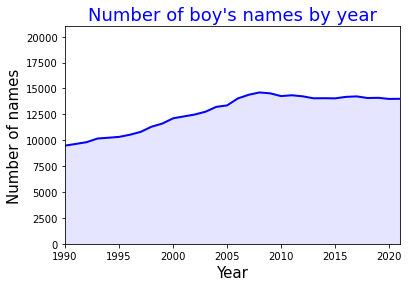

In [22]:
name_count_m = name_count[name_count.gender == "M"]

plt.plot(name_count_m.year, name_count_m.name_count, color="blue", linewidth = 2)

plt.fill_between(name_count_m.year, name_count_m.name_count, color="blue", alpha = 0.1)

plt.xlim(1990,2021)
plt.ylim(0,21000)

plt.title("Number of boy's names by year", size=18, color="blue")
plt.xlabel('Year', size=15)
plt.ylabel('Number of names', size=15)

Text(0, 0.5, 'Number of names')

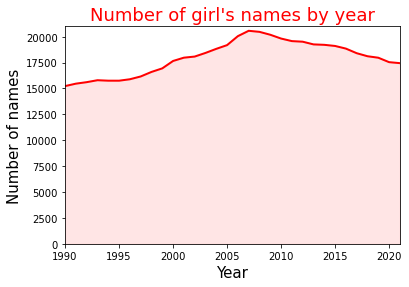

In [24]:
name_count_f = name_count[name_count.gender == "F"]
plt.plot(name_count_f.year, name_count_f.name_count, color="red", linewidth = 2)
plt.fill_between(name_count_f.year, name_count_f.name_count, color="red", alpha = 0.1)
plt.xlim(1990,2021)
plt.ylim(0,21000)
plt.title("Number of girl's names by year", size=18, color="red")
plt.xlabel('Year', size=15)
plt.ylabel('Number of names', size=15)

# Conslusion: the choice of male and female names are rising, thus causes the phenomenon. 

